# CIFAR-10 Photo Classification

### Importing the libraries

In [1]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization

Using TensorFlow backend.


### Loading the dataset

In [2]:
# load train and test dataset
def load_dataset():
	# load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
  print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

  # plot first few images
  for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i])
  # show the figure
  pyplot.show()

	# one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

### Scaling and normalizing pictures

In [3]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

### Plotting the graphs

In [4]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.ylabel('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.ylabel('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
	#pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()

### (Question 1). Defining and running Baseline : 1 VGG Block for 40 epochs 

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


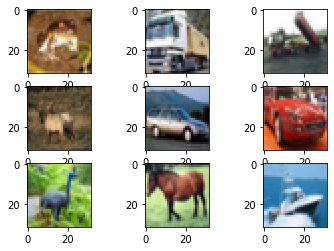

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
____________________________________________

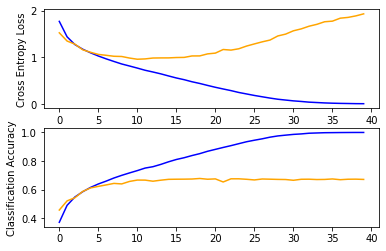

In [5]:
# define shallow cnn model
def define_model_vgg_1_40():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	model.summary()
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_1_40() 
 	# fit model - with ORIGINAL DATA
	history = model.fit(trainX, trainY, epochs= 40, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### (Question 2). Defining and running Baseline : 3 VGG Block for 40 epochs

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


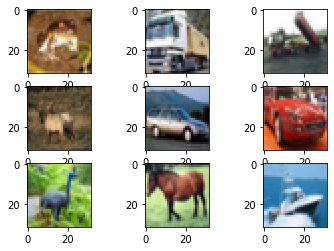

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

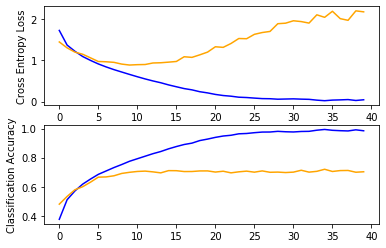

In [6]:
def define_model_vgg_3_40():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
    
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	model.summary()
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_40() 
 	# fit model - with ORIGINAL DATA
	history = model.fit(trainX, trainY, epochs= 40, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### (Question 3). Defining and running Baseline : 3 VGG Block with Dropout Regularization for 60 epochs

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


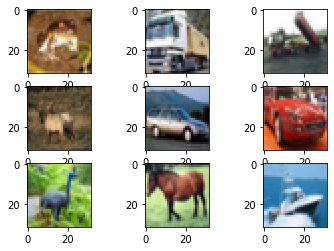

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

Epoch 42/60
50000/50000 [==============================] - 8s 154us/step - loss: 0.4310 - acc: 0.8457 - val_loss: 0.5909 - val_acc: 0.8022
Epoch 43/60
50000/50000 [==============================] - 8s 152us/step - loss: 0.4250 - acc: 0.8501 - val_loss: 0.6182 - val_acc: 0.7928
Epoch 44/60
50000/50000 [==============================] - 8s 154us/step - loss: 0.4143 - acc: 0.8519 - val_loss: 0.5840 - val_acc: 0.8059
Epoch 45/60
50000/50000 [==============================] - 8s 153us/step - loss: 0.4065 - acc: 0.8557 - val_loss: 0.5986 - val_acc: 0.8027
Epoch 46/60
50000/50000 [==============================] - 8s 153us/step - loss: 0.4002 - acc: 0.8582 - val_loss: 0.5785 - val_acc: 0.8077
Epoch 47/60
50000/50000 [==============================] - 8s 152us/step - loss: 0.3911 - acc: 0.8596 - val_loss: 0.6197 - val_acc: 0.7999
Epoch 48/60
50000/50000 [==============================] - 8s 153us/step - loss: 0.3838 - acc: 0.8641 - val_loss: 0.5794 - val_acc: 0.8106
Epoch 49/60
50000/50000 [==

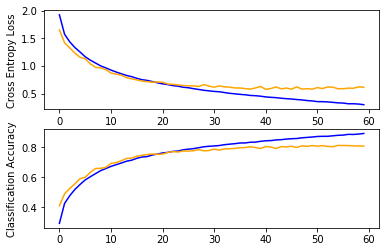

In [7]:
def define_model_vgg_3_60_dropout():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))  
    
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	model.summary()
	return model
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_60_dropout() 
 	# fit model - with ORIGINAL DATA
	history = model.fit(trainX, trainY, epochs= 60, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### (Question 4). Defining and running Baseline : 3 VGG Block with Dropout Regularization and Data Augmentation for 100 epochs 

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


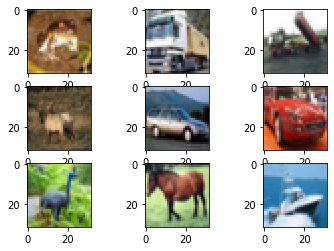

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)         

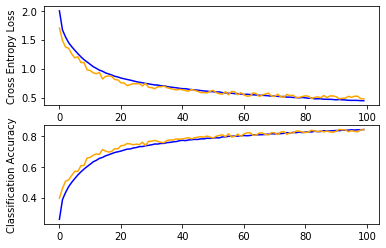

In [8]:
def define_model_vgg_3_100_dropout_augment():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))  
    
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.0)) 
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	model.summary()
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment() 
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
    
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### (Question 5). Defining and running Baseline : 3 VGG Block Dropout Regularization and Data Normalization and Batch Normalization for 100 epochs 

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


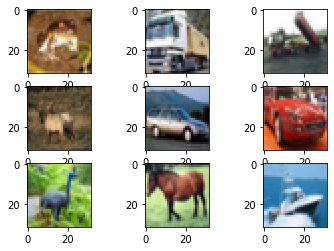

Epoch 1/100
781/781 [==============================] - 18s 23ms/step - loss: 1.7802 - acc: 0.3730 - val_loss: 1.3649 - val_acc: 0.5093
Epoch 2/100
781/781 [==============================] - 17s 21ms/step - loss: 1.4281 - acc: 0.4848 - val_loss: 1.3447 - val_acc: 0.5220
Epoch 3/100
781/781 [==============================] - 18s 23ms/step - loss: 1.3049 - acc: 0.5311 - val_loss: 1.2620 - val_acc: 0.5547
Epoch 4/100
781/781 [==============================] - 17s 22ms/step - loss: 1.2208 - acc: 0.5626 - val_loss: 1.1948 - val_acc: 0.5760
Epoch 5/100
781/781 [==============================] - 17s 21ms/step - loss: 1.1526 - acc: 0.5883 - val_loss: 1.1711 - val_acc: 0.5903
Epoch 6/100
781/781 [==============================] - 18s 23ms/step - loss: 1.0870 - acc: 0.6133 - val_loss: 1.0413 - val_acc: 0.6355
Epoch 7/100
781/781 [==============================] - 17s 22ms/step - loss: 1.0448 - acc: 0.6277 - val_loss: 1.0086 - val_acc: 0.6493
Epoch 8/100
781/781 [==============================] - 

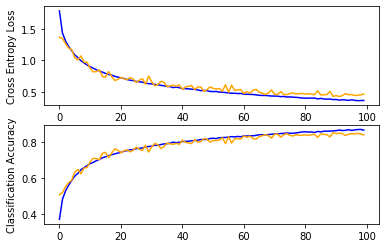

In [9]:
def define_model_vgg_3_100_dropout_augment_batchnorm():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment_batchnorm() 
    
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
  
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### (Question 6). Selecting best model as the above one by the accuracy 

#### (Question 6). Run the best model for 100 epochs again 

#### (Question 7). Saving the best model as final_model_no_callbacks

Epoch 1/100
781/781 [==============================] - 17s 22ms/step - loss: 1.7712 - acc: 0.3751 - val_loss: 1.4248 - val_acc: 0.4793
Epoch 2/100
781/781 [==============================] - 19s 24ms/step - loss: 1.4239 - acc: 0.4848 - val_loss: 1.3002 - val_acc: 0.5365
Epoch 3/100
781/781 [==============================] - 17s 22ms/step - loss: 1.2935 - acc: 0.5352 - val_loss: 1.2559 - val_acc: 0.5479
Epoch 4/100
781/781 [==============================] - 17s 21ms/step - loss: 1.1864 - acc: 0.5748 - val_loss: 1.1140 - val_acc: 0.6061
Epoch 5/100
781/781 [==============================] - 18s 24ms/step - loss: 1.1233 - acc: 0.5970 - val_loss: 1.0663 - val_acc: 0.6132
Epoch 6/100
781/781 [==============================] - 17s 22ms/step - loss: 1.0686 - acc: 0.6191 - val_loss: 1.1141 - val_acc: 0.6003
Epoch 7/100
781/781 [==============================] - 16s 21ms/step - loss: 1.0167 - acc: 0.6388 - val_loss: 1.0967 - val_acc: 0.6151
Epoch 8/100
781/781 [==============================] - 

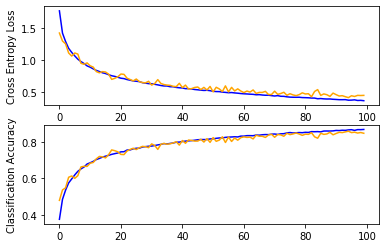

In [23]:
def define_model_vgg_3_100_dropout_augment_batchnorm_final():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment_batchnorm_final() 
    
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
	# save model
	model.save('final_model_no_callbacks.h5')    
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### (Question 8). Showing the output of a program that loads the saved model and evaluates it on the test set

### (Question 8). Evaluating the best model -  final_model_no_callbacks on test set

#### Loading the final_model_no_callbacks

In [24]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model_no_callbacks.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()

> 84.780


### Making prediction with the test dataset

In [25]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model_no_callbacks.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])
#entry point, run the example
run_example()

4


## (Question 9). Splitting the training set up into a train set of 40,000 examples and a validation set of 10,000 examples

### Running Baseline : 3 VGG Block with training 40000 and validation 10000 no Early Stopping

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 13s 337us/step - loss: 1.7130 - acc: 0.4014 - val_loss: 1.3785 - val_acc: 0.5076
Epoch 2/100
40000/40000 [==============================] - 12s 312us/step - loss: 1.3284 - acc: 0.5223 - val_loss: 1.2936 - val_acc: 0.5349
Epoch 3/100
40000/40000 [==============================] - 12s 312us/step - loss: 1.1815 - acc: 0.5775 - val_loss: 1.2056 - val_acc: 0.5710
Epoch 4/100
40000/40000 [==============================] - 13s 313us/step - loss: 1.0790 - acc: 0.6183 - val_loss: 1.1073 - val_acc: 0.6093
Epoch 5/100
40000/40000 [==============================] - 12s 312us/step - loss: 1.0011 - acc: 0.6435 - val_loss: 0.9738 - val_acc: 0.6565
Epoch 6/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.9441 - acc: 0.6666 - val_loss: 1.0489 - val_acc: 0.6244
Epoch 7/100
40000/40000 [==============================] - 13s 313us/step - loss: 0.9015 - acc: 0.6827 - val_l

Epoch 59/100
40000/40000 [==============================] - 13s 313us/step - loss: 0.2257 - acc: 0.9197 - val_loss: 0.5794 - val_acc: 0.8193
Epoch 60/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.2188 - acc: 0.9224 - val_loss: 0.6043 - val_acc: 0.8154
Epoch 61/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.2137 - acc: 0.9240 - val_loss: 0.5891 - val_acc: 0.8250
Epoch 62/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.2075 - acc: 0.9264 - val_loss: 0.5834 - val_acc: 0.8251
Epoch 63/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.2003 - acc: 0.9291 - val_loss: 0.5735 - val_acc: 0.8256
Epoch 64/100
40000/40000 [==============================] - 13s 313us/step - loss: 0.1964 - acc: 0.9300 - val_loss: 0.5882 - val_acc: 0.8199
Epoch 65/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.1957 - acc: 0.9298 - val_loss: 0.5898 - val_acc: 0.8235
Epoch 66/100


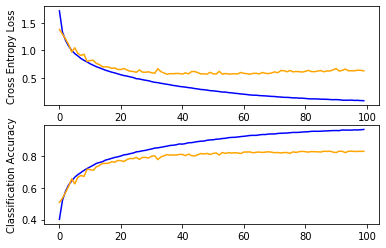

In [13]:
def define_model_vgg_3_100_dropout_augment_batchnorm_40000_10000():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment_batchnorm_40000_10000() 
	callbacks = [EarlyStopping(monitor='val_loss', patience=4)]
    
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit(trainX, trainY, epochs= 100, batch_size=64,validation_split=0.2,verbose=1)
    
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### Splitting training set up into a train set of 40,000 examples and a validation set of 10,000 examples

### Implementing Early stopping using the validation set 

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 14s 341us/step - loss: 1.7248 - acc: 0.3947 - val_loss: 1.6106 - val_acc: 0.4175
Epoch 2/100
40000/40000 [==============================] - 13s 313us/step - loss: 1.3251 - acc: 0.5246 - val_loss: 1.3962 - val_acc: 0.5064
Epoch 3/100
40000/40000 [==============================] - 13s 313us/step - loss: 1.1879 - acc: 0.5759 - val_loss: 1.1669 - val_acc: 0.5898
Epoch 4/100
40000/40000 [==============================] - 12s 312us/step - loss: 1.0828 - acc: 0.6170 - val_loss: 1.1198 - val_acc: 0.5971
Epoch 5/100
40000/40000 [==============================] - 13s 313us/step - loss: 1.0100 - acc: 0.6421 - val_loss: 1.0126 - val_acc: 0.6435
Epoch 6/100
40000/40000 [==============================] - 13s 313us/step - loss: 0.9550 - acc: 0.6626 - val_loss: 0.9638 - val_acc: 0.6567
Epoch 7/100
40000/40000 [==============================] - 13s 313us/step - loss: 0.9126 - acc: 0.6783 - val_l

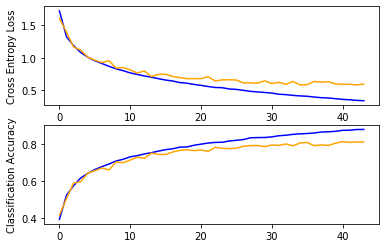

In [14]:
from keras.layers import BatchNormalization
def define_model_vgg_3_100_dropout_augment_batchnorm_early():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment_batchnorm_early() 
	callbacks = [EarlyStopping(monitor='val_loss', patience=9)]
    
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit(trainX, trainY, epochs= 100, batch_size=64,validation_split=0.2, callbacks = callbacks,verbose=1)
      
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

## Repeating the steps 6 - 8 

### Creating the best model running for 100 epochs and saving as final_model_with_callbacks

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 14s 340us/step - loss: 1.6915 - acc: 0.4086 - val_loss: 1.5266 - val_acc: 0.4491
Epoch 2/100
40000/40000 [==============================] - 12s 311us/step - loss: 1.2876 - acc: 0.5390 - val_loss: 1.3899 - val_acc: 0.5071
Epoch 3/100
40000/40000 [==============================] - 12s 311us/step - loss: 1.1479 - acc: 0.5925 - val_loss: 1.2228 - val_acc: 0.5643
Epoch 4/100
40000/40000 [==============================] - 12s 311us/step - loss: 1.0603 - acc: 0.6226 - val_loss: 1.1295 - val_acc: 0.5961
Epoch 5/100
40000/40000 [==============================] - 12s 312us/step - loss: 0.9849 - acc: 0.6508 - val_loss: 1.1306 - val_acc: 0.5981
Epoch 6/100
40000/40000 [==============================] - 12s 311us/step - loss: 0.9258 - acc: 0.6734 - val_loss: 0.9341 - val_acc: 0.6703
Epoch 7/100
40000/40000 [==============================] - 12s 311us/step - loss: 0.8835 - acc: 0.6887 - val_l

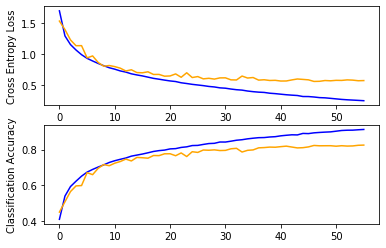

In [16]:
from keras.layers import BatchNormalization
def define_model_vgg_3_100_dropout_augment_batchnorm_early_final():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment_batchnorm_early_final() 
	callbacks = [EarlyStopping(monitor='val_loss', patience=9)]
    
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit(trainX, trainY, epochs= 100, batch_size=64,validation_split=0.2, callbacks = callbacks,verbose=1)
	# save model
	model.save('final_model_with_callbacks.h5')       
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

### Showing the output of the program that loads the model and evaluates it on the test set

### Evaluating the final_model_with_callbacks on test set

#### Loading the final_model_with_callbacks

In [17]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model_with_callbacks.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()

> 81.870


### Making prediction with the test dataset

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model_with_callbacks.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])
#entry point, run the example
run_example()

4


## The best model

In [ ]:
def define_model_vgg_3_100_dropout_augment_batchnorm():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.0))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
	return model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model_vgg_3_100_dropout_augment_batchnorm() 
    
    
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
  
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Rinda Digamarthi(157742d)